In [1]:
# 检测环境是否安装
%time !pip install pandas openpyxl matplotlib
%matplotlib inline

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Wall time: 1.32 s


In [2]:
import pandas as pd
dataset = pd.read_excel('dataset/classification_train.xlsx')
test_dataset = pd.read_excel('dataset/classification_test.xlsx')
dataset['Conscious'].fillna(0,inplace=True)
dataset['agitate'].fillna(0,inplace=True)
dataset['HR'].fillna(80,inplace=True)
dataset['RR'].fillna(16,inplace=True)
dataset['SBP'].fillna(100,inplace=True)
dataset['Spo2'].fillna(100,inplace=True)
dataset['Po2'].fillna(82,inplace=True)
dataset['Pco2'].fillna(40,inplace=True)
dataset['BE'].fillna(0,inplace=True)
dataset['LA'].fillna(1,inplace=True)
dataset['PH'].fillna(7.4,inplace=True)
dataset['BS'].fillna(4.5,inplace=True)


test_dataset['Conscious'].fillna(0,inplace=True)
test_dataset['agitate'].fillna(0,inplace=True)
test_dataset['HR'].fillna(80,inplace=True)
test_dataset['RR'].fillna(16,inplace=True)
test_dataset['SBP'].fillna(100,inplace=True)
test_dataset['Spo2'].fillna(100,inplace=True)
test_dataset['Po2'].fillna(82,inplace=True)
test_dataset['Pco2'].fillna(40,inplace=True)
test_dataset['BE'].fillna(0,inplace=True)
test_dataset['LA'].fillna(1,inplace=True)
test_dataset['PH'].fillna(7.4,inplace=True)
test_dataset['BS'].fillna(4.5,inplace=True)
# delete Conscious and agitate
# dataset = dataset.drop(columns=['Conscious','agitate'])
# test_dataset = test_dataset.drop(columns=['Conscious','agitate'])
# delete the nan lines
dataset = dataset.dropna(axis=0,how='any')
test_dataset = test_dataset.dropna(axis=0,how='any')
# delete when the PVID exists more than one time
dataset.drop_duplicates(subset=['PVID'],keep=False)
test_dataset.drop_duplicates(subset=['PVID'],keep=False)

# delete the nan lines
test_dataset = test_dataset.dropna(axis=0,how='any')

test_dataset.loc[test_dataset['Label'] == 3] = 2
test_dataset

# dataset
# test_dataset

,PVID,age,gender,HR,RR,SBP,Spo2,Po2,Pco2,BE,LA,PH,BS,Conscious,agitate,Label
0,2126,41,1,61.0,22.0,126.0,100.0,82.0,41.0,0.0,0.8,7.48,5.8,0.0,0.0,1
1,2127,41,1,79.0,17.0,140.0,99.0,82.0,32.0,0.0,1.2,7.51,6.3,0.0,0.0,1
2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2
3,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2
4,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2
512,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2
513,2639,32,0,145.0,21.0,102.0,96.0,147.0,15.0,-17.3,10.3,7.30,13.9,1.0,0.0,1
514,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2


In [3]:
%time !pip install scikit-learn

dataset

Wall time: 1.32 s


,PVID,age,gender,HR,RR,SBP,Spo2,Po2,Pco2,BE,LA,PH,BS,Conscious,agitate,Label
0,1,28,0,95.0,21.0,94.0,96.0,84.0,41.0,-0.8,0.7,7.38,6.6,0.0,0.0,1
1,2,84,0,74.0,20.0,120.0,98.0,123.0,37.0,3.3,0.9,7.47,6.3,0.5,0.0,1
2,3,51,0,102.0,22.0,92.0,98.0,115.0,41.0,7.2,0.7,7.49,4.7,0.0,0.0,1
3,4,59,1,90.0,22.0,132.0,98.0,66.0,34.0,-10.8,5.9,7.26,11.3,0.0,0.0,2
4,5,32,1,119.0,22.0,123.0,99.0,81.0,35.0,-11.4,7.0,7.24,7.3,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2121,26,1,84.0,16.0,153.0,99.0,108.0,47.0,2.7,1.4,7.39,4.7,0.0,0.0,0
2121,2122,84,1,73.0,16.0,96.0,96.0,47.0,83.0,8.0,2.9,7.28,13.4,0.0,0.0,0
2122,2123,21,1,117.0,16.0,127.0,96.0,65.0,38.0,6.0,1.1,7.50,6.1,0.5,0.0,1
2123,2124,21,1,117.0,16.0,127.0,96.0,65.0,38.0,6.0,1.1,7.50,6.1,0.5,0.0,1


In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import KFold
from numpy import mean
import numpy as np
import copy


# print(dataset)
def train_classifier(model,features,kfold_num):
    kf = KFold(kfold_num,shuffle=True,random_state = 2)
    X = dataset[features]
    Y = dataset['Label']
    test_X = test_dataset[features]
    test_Y = test_dataset['Label']
    # print(Y)
    best_f1 = 0
    best_model = copy.deepcopy(model)
    for train,valid in kf.split(dataset):
        train_X = X.iloc[train,:]
        train_Y = Y.iloc[train]
        model.fit(train_X,train_Y)
        valid_X = X.iloc[valid,:]
        valid_Y = Y.iloc[valid]
        predict_Y = model.predict(valid_X)
        if (f1_score(valid_Y,model.predict(valid_X),average='weighted')>best_f1):
            best_f1 = f1_score(valid_Y,model.predict(valid_X),average='weighted')
            best_model = copy.deepcopy(model)
        # print(predict_Y)
    # print(model.predict(test_X).unqiue())
    print(classification_report(test_Y,best_model.predict(test_X)))
    return f1_score(test_Y,model.predict(test_X),average='weighted')
    


------------------------ KNN Classifier with 2 neighbours -----------------------------------
              precision    recall  f1-score   support

           0       0.61      0.84      0.71        93
           1       0.96      0.72      0.83       280
           2       0.81      1.00      0.89       143

    accuracy                           0.82       516
   macro avg       0.79      0.85      0.81       516
weighted avg       0.85      0.82      0.82       516

------------------------ KNN Classifier with 5 neighbours -----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        93
           1       0.93      0.78      0.85       280
           2       0.81      1.00      0.90       143

    accuracy                           0.84       516
   macro avg       0.80      0.85      0.82       516
weighted avg       0.85      0.84      0.84       516

------------------------ KNN Classifier with 8 nei

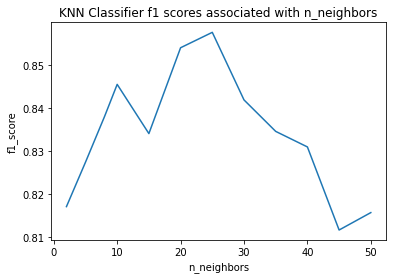

In [5]:
### KNN Classifier    
from sklearn.neighbors import KNeighborsClassifier
kflod_num = 15
features = ['RR','Po2','Pco2','BE','LA']
n_neighbour_choices = [2,5,8,10,15,20,25,30,35,40,45,50]
f1_scores = []
for n_neighbour in n_neighbour_choices:
    print('------------------------ KNN Classifier with '+ str(n_neighbour) + ' neighbours -----------------------------------')
    clf = KNeighborsClassifier(n_neighbors=n_neighbour)
    f1_scores.append(train_classifier(clf,features,kflod_num))
plt.xlabel('n_neighbors')
plt.ylabel('f1_score')
plt.title('KNN Classifier f1 scores associated with n_neighbors')
plt.plot(n_neighbour_choices,f1_scores)
plt.show()

------------------------ Random Forest Classifier with 2 n_estimators -----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        93
           1       0.95      0.70      0.80       280
           2       0.74      1.00      0.85       143

    accuracy                           0.81       516
   macro avg       0.79      0.85      0.80       516
weighted avg       0.84      0.81      0.81       516

------------------------ Random Forest Classifier with 5 n_estimators -----------------------------------
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        93
           1       0.95      0.73      0.83       280
           2       0.76      1.00      0.86       143

    accuracy                           0.83       516
   macro avg       0.81      0.87      0.82       516
weighted avg       0.86      0.83      0.83       516

------------------------ R

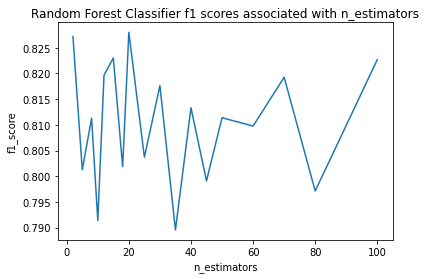

In [6]:

### Random Forest Classifier    
from sklearn.ensemble import RandomForestClassifier

kfold_num = 15
features = ['RR','Po2','Pco2','BE','LA']
n_estimators_choices = [2,5,8,10,12,15,18,20,25,30,35,40,45,50,60,70,80,100]
f1_scores = []
for n_estimators in n_estimators_choices:
    print('------------------------ Random Forest Classifier with '+ str(n_estimators) + ' n_estimators -----------------------------------')
    clf = RandomForestClassifier(n_estimators=8)
    f1_scores.append(train_classifier(clf,features,kflod_num))
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.title('Random Forest Classifier f1 scores associated with n_estimators')
plt.plot(n_estimators_choices,f1_scores)
plt.show()

------------------------ AdaBoost Classifier with 2 n_estimators-----------------------------------
              precision    recall  f1-score   support

           0       0.63      0.98      0.77        93
           1       0.99      0.80      0.89       280
           2       0.99      1.00      0.99       143

    accuracy                           0.89       516
   macro avg       0.87      0.93      0.88       516
weighted avg       0.93      0.89      0.90       516

------------------------ AdaBoost Classifier with 5 n_estimators-----------------------------------
              precision    recall  f1-score   support

           0       0.63      0.98      0.77        93
           1       1.00      0.70      0.82       280
           2       0.81      1.00      0.89       143

    accuracy                           0.83       516
   macro avg       0.81      0.89      0.83       516
weighted avg       0.88      0.83      0.83       516

------------------------ AdaBoost Clas

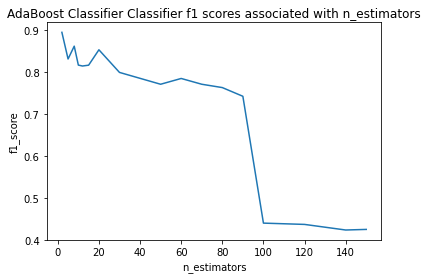

In [7]:
### AdaBoost Classifier
from sklearn.ensemble import  AdaBoostClassifier
 

kfold_num = 15
features = ['RR','Po2','Pco2','BE','LA']
n_estimators_choices = [2,5,8,10,12,15,20,30,50,60,70,80,90,100,120,140,150]
f1_scores = []
for n_estimators in n_estimators_choices:
    print('------------------------ AdaBoost Classifier with '+ str(n_estimators) + ' n_estimators-----------------------------------')
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    f1_scores.append(train_classifier(clf,features,kflod_num))
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.title('AdaBoost Classifier Classifier f1 scores associated with n_estimators')
plt.plot(n_estimators_choices,f1_scores)
plt.show()

In [9]:
### Gaussian Naive Bayes Classifier    
from sklearn.naive_bayes import GaussianNB
kfold_num = 15
features = ['RR','Po2','Pco2','BE','LA']
clf = GaussianNB()
train_classifier(clf,features,kfold_num)

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        93
           1       0.99      0.71      0.83       280
           2       0.77      1.00      0.87       143

    accuracy                           0.83       516
   macro avg       0.81      0.88      0.82       516
weighted avg       0.87      0.83      0.83       516



0.8317178746583119